<a href="https://colab.research.google.com/github/nkosig/stock-price-modelling/blob/main/Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


yfinance version: 0.2.54


[*********************100%***********************]  1 of 1 completed


data size (3808, 5)
train data shape (2013, 5)
test data shape (1795, 5) columns MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
close_test_data shape: (1795, 5)
predictions shape: (1795, 1)


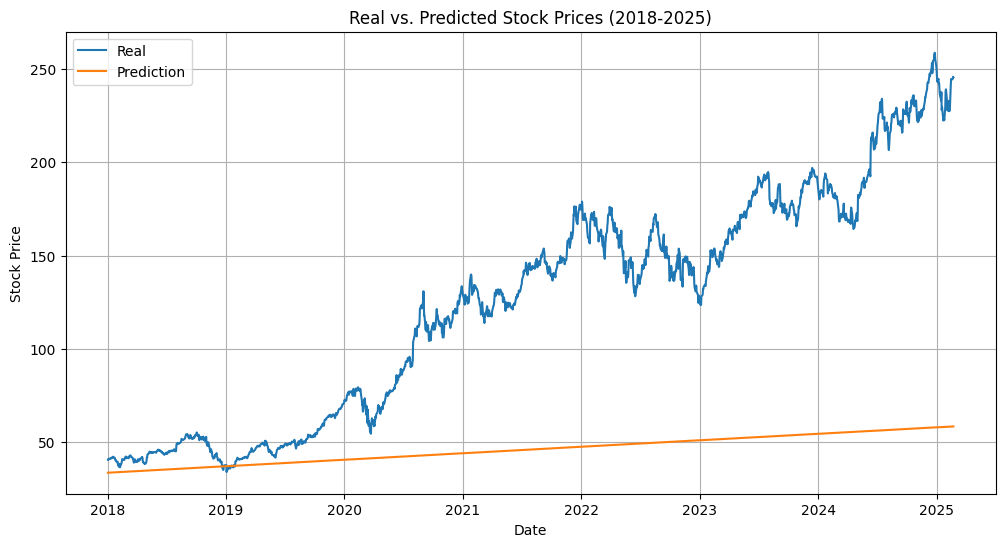

In [3]:
# prompt: ingest stock price for a company from 2010 to 2018 and use 2018 to 2025 data to validate model prediction. Plot real vs prediction 2018 to 2025 data

!pip install yfinance==0.2.54

import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Download historical data
try:
  yfinance_version = yf.__version__
  print(f"yfinance version: {yf.__version__}")
  data = yf.download("AAPL", start="2010-01-01", end="2025-12-31")
  print(f"data size {data.shape}")
except Exception as e:
  print(f"Error downloading data: {e}")
  exit()

# Separate training and testing data
train_data = data["2010":"2017"]
print(f"train data shape {train_data.shape}")
test_data = data["2018":"2025"]
print(f"test data shape {test_data.shape} columns {test_data.columns}")


# Prepare the data for the model
x_train = np.arange(len(train_data)).reshape(-1, 1)
y_train = train_data["Close"]

# Create and train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict stock prices for the test set
x_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)
predictions = model.predict(x_test)

# Create a dataframe for plotting real vs
close_test_data = test_data["Close"]
print(f"close_test_data shape: {test_data.shape}")
print(f"predictions shape: {predictions.shape}")
df_plot = pd.DataFrame({"Real": close_test_data.values.flatten(), "Prediction": predictions.flatten()}, index=test_data.index)

# Plot real vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df_plot["Real"], label="Real")
plt.plot(df_plot["Prediction"], label="Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Real vs. Predicted Stock Prices (2018-2025)")
plt.legend()
plt.grid(True)
plt.show()
